## Description
**For CAD & MDD:**
1. QQ Plots
2. Miami Plot
3. Volcano Plots
4. Barplot for Significant SNPs per chromosome

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("../1_CAD/CAD_clean.csv")
df2 = pd.read_csv("../2_MDD/MDD_clean.csv")

In [3]:
print("CAD:")
df1.head()

CAD:


,CHR,SNP,BP,A1,A2,OR,BETA,SE_BETA,P,Z,MAF
0,1,rs143225517,751756,C,T,1.013091,0.013006,0.017324,0.452802,0.750750,0.158264
1,1,rs3094315,752566,A,G,0.994771,-0.005243,0.015765,0.739460,-0.332568,0.763018
2,1,rs3131972,752721,G,A,0.996973,-0.003032,0.015638,0.846265,-0.193885,0.740969
3,1,rs3131971,752894,C,T,1.004651,0.004640,0.016238,0.775066,0.285755,0.744287
4,1,rs61770173,753405,A,C,0.993729,-0.006291,0.016708,0.706526,-0.376526,0.775368


In [4]:
print("MDD:")
df2.head()

MDD:


,CHR,SNP,BP,A1,A2,OR,BETA,SE_BETA,P,Z,MAF
0,1,rs12238997,693731,A,G,0.99900,-0.001001,0.0107,0.9284,-0.093505,0.843911
1,1,rs4951859,729679,C,G,0.99790,-0.002102,0.0097,0.8311,-0.216722,0.193262
2,1,rs148120343,730087,T,C,0.98423,-0.015896,0.0171,0.3532,-0.929571,0.944587
3,1,rs142557973,731718,T,C,1.00030,0.000300,0.0102,0.9760,0.029407,0.836911
4,1,rs141242758,734349,T,C,0.99900,-0.001001,0.0102,0.9207,-0.098088,0.838911


## 1. QQ plots for CAD and MDD

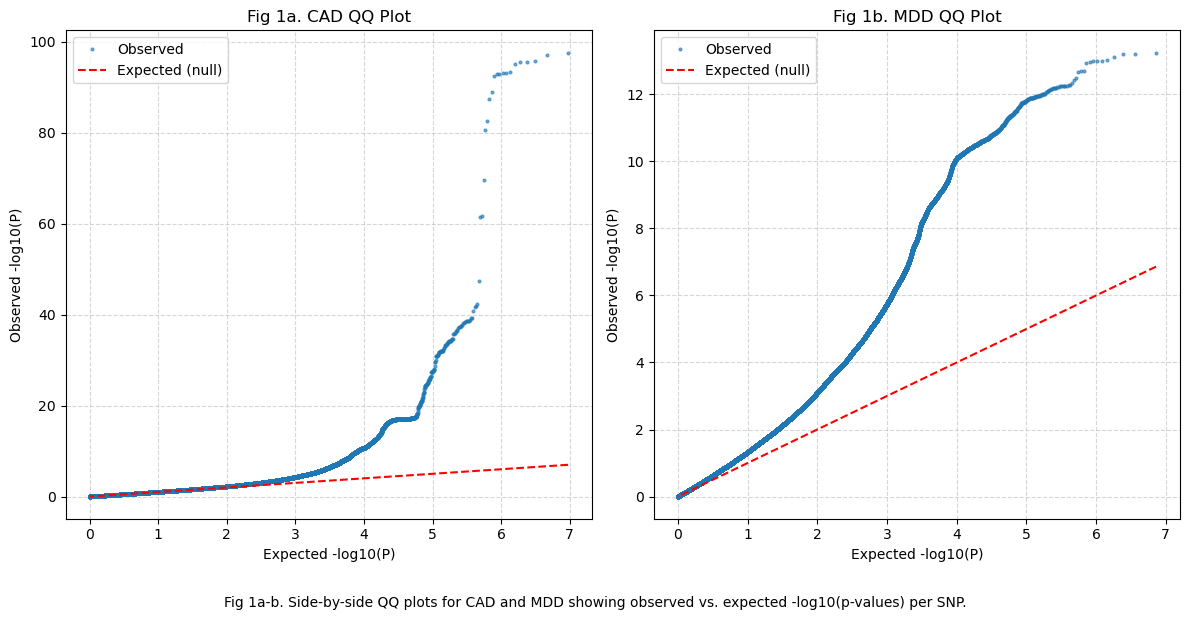

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Clean P-values for CAD ----
p_values_cad = df1['P'].dropna()
p_values_cad = p_values_cad[p_values_cad > 0]
n_cad = len(p_values_cad)
expected_cad = -np.log10(np.linspace(1/n_cad, 1, n_cad))
observed_cad = -np.log10(np.sort(p_values_cad))

# ---- Clean P-values for MDD ----
p_values_mdd = df2['P'].dropna()
p_values_mdd = p_values_mdd[p_values_mdd > 0]
n_mdd = len(p_values_mdd)
expected_mdd = -np.log10(np.linspace(1/n_mdd, 1, n_mdd))
observed_mdd = -np.log10(np.sort(p_values_mdd))

# ---- Side-by-Side QQ Plots ----
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# --- Plot 1: CAD ---
axes[0].plot(expected_cad, observed_cad, 'o', markersize=2, alpha=0.6, label='Observed')
axes[0].plot(expected_cad, expected_cad, 'r--', label='Expected (null)')
axes[0].set_xlabel('Expected -log10(P)')
axes[0].set_ylabel('Observed -log10(P)')
axes[0].set_title('Fig 1a. CAD QQ Plot')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)

# --- Plot 2: MDD ---
axes[1].plot(expected_mdd, observed_mdd, 'o', markersize=2, alpha=0.6, label='Observed')
axes[1].plot(expected_mdd, expected_mdd, 'r--', label='Expected (null)')
axes[1].set_xlabel('Expected -log10(P)')
axes[1].set_ylabel('Observed -log10(P)')
axes[1].set_title('Fig 1b. MDD QQ Plot')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)

# --- Caption below both plots ---
fig.text(0.5, -0.02,
         'Fig 1a-b. Side-by-side QQ plots for CAD and MDD showing observed vs. expected -log10(p-values) per SNP.',
         ha='center', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 1])  # leave space for caption
plt.savefig("CAD_MDD_QQplots_side_by_side.jpeg", dpi=300, bbox_inches='tight')
plt.show()


## 2. Miami Plot for CAD & MDD

/vast/palmer/apps/services/ood/grace/var_www_ood_apps/conda/ycrc_default/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/vast/palmer/apps/services/ood/grace/var_www_ood_apps/conda/ycrc_default/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_1685887/4122755312.py:44: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/tmp/ipykernel_1685887/4122755312.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. 

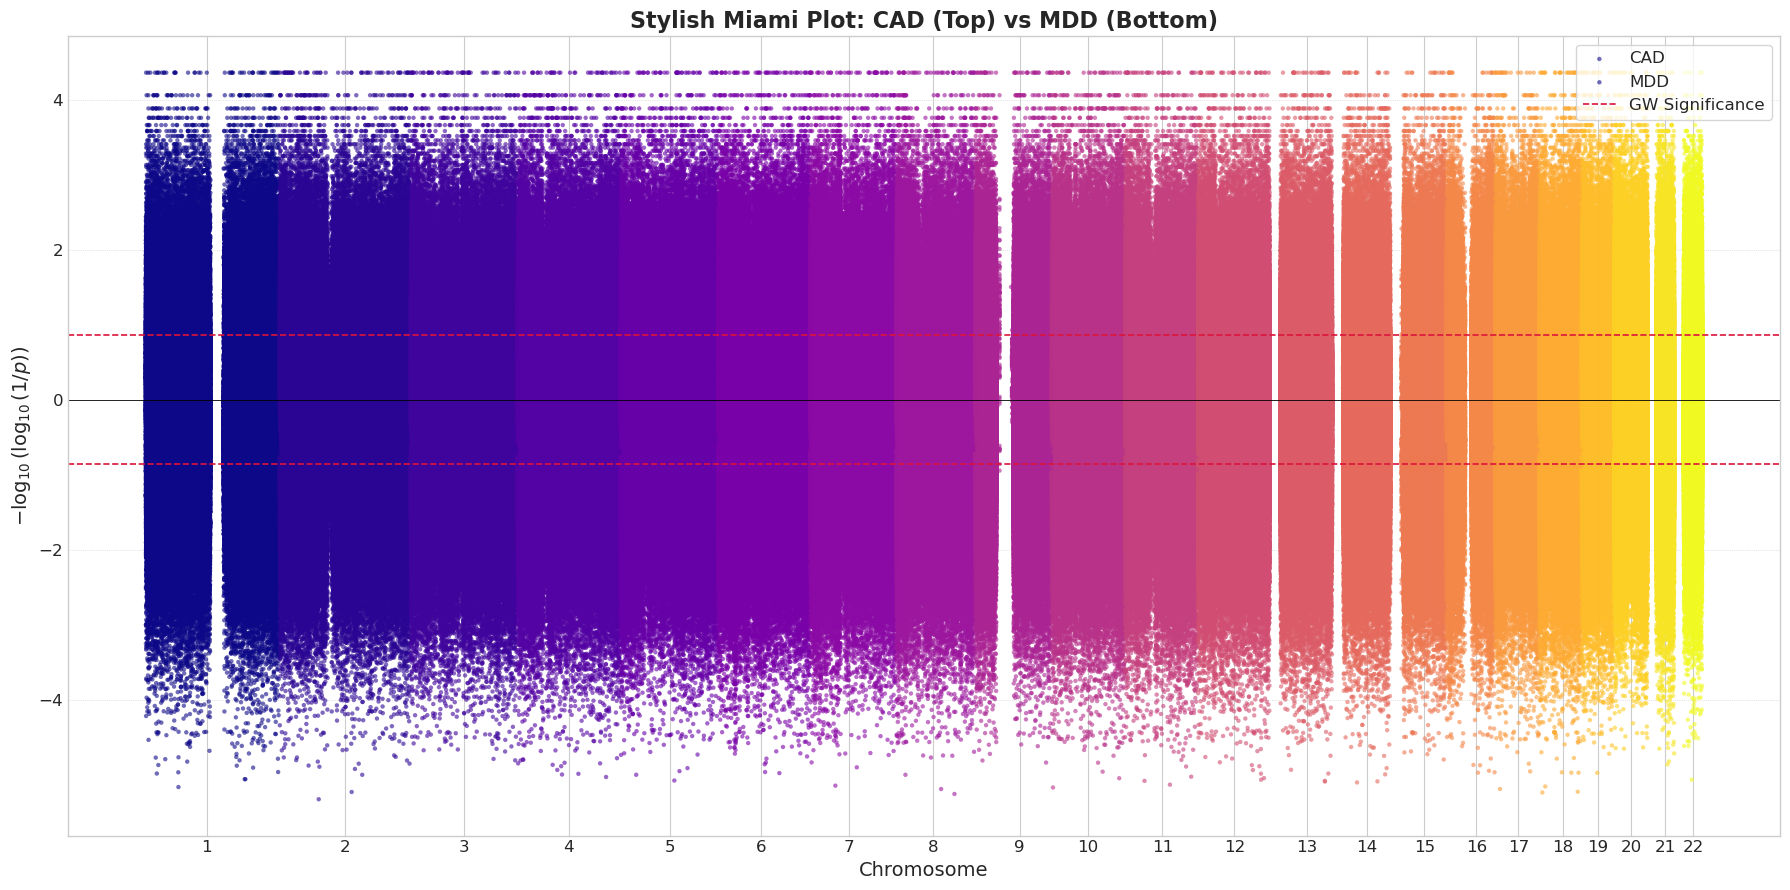

In [6]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import cm

# # --- Prepare Data (same as before) ---
# epsilon = 1e-300
# df1 = df1[df1['P'] > 0].copy()
# df2 = df2[df2['P'] > 0].copy()
# df1['P'] = df1['P'].clip(lower=epsilon)
# df2['P'] = df2['P'].clip(lower=epsilon)

# df1 = df1.dropna(subset=['CHR', 'BP', 'P'])
# df2 = df2.dropna(subset=['CHR', 'BP', 'P'])

# df1['CHR'] = df1['CHR'].astype(int)
# df2['CHR'] = df2['CHR'].astype(int)
# df1['BP'] = df1['BP'].astype(int)
# df2['BP'] = df2['BP'].astype(int)

# df1 = df1.sort_values(['CHR', 'BP'])
# df2 = df2.sort_values(['CHR', 'BP'])

# df1['loglogp'] = np.log10(np.log10(1 / df1['P']))
# df2['loglogp'] = np.log10(np.log10(1 / df2['P']))
# signif_threshold = np.log10(np.log10(1 / 5e-8))

# # --- Cumulative Position Setup ---
# all_chrs = sorted(set(df1['CHR'].unique()).union(set(df2['CHR'].unique())))
# chrom_offsets = {}
# offset = 0
# for chr_ in all_chrs:
#     max_bp = max(
#         df1[df1['CHR'] == chr_]['BP'].max() if chr_ in df1['CHR'].values else 0,
#         df2[df2['CHR'] == chr_]['BP'].max() if chr_ in df2['CHR'].values else 0
#     )
#     chrom_offsets[chr_] = offset
#     offset += max_bp + 1e6

# df1['cum_bp'] = df1.apply(lambda row: row['BP'] + chrom_offsets[row['CHR']], axis=1)
# df2['cum_bp'] = df2.apply(lambda row: row['BP'] + chrom_offsets[row['CHR']], axis=1)

# # --- Plot Styling ---
# plt.figure(figsize=(18, 9))
# plt.style.use('seaborn-whitegrid')

# # Vibrant color cycle (e.g., from plasma colormap)
# color_map = cm.get_cmap('plasma', len(all_chrs))
# colors = [color_map(i) for i in range(len(all_chrs))]

# # --- Plot CAD (Top) ---
# for i, chr_ in enumerate(all_chrs):
#     chr_df = df1[df1['CHR'] == chr_]
#     plt.scatter(chr_df['cum_bp'], chr_df['loglogp'], color=colors[i], s=10, alpha=0.6, edgecolor='none', label="CAD" if i == 0 else "")

# # --- Plot MDD (Bottom) ---
# for i, chr_ in enumerate(all_chrs):
#     chr_df = df2[df2['CHR'] == chr_]
#     plt.scatter(chr_df['cum_bp'], -chr_df['loglogp'], color=colors[i], s=10, alpha=0.6, edgecolor='none', label="MDD" if i == 0 else "")

# # --- Chromosome labels ---
# tick_positions = []
# tick_labels = []
# for chr_ in all_chrs:
#     pos = []
#     if chr_ in df1['CHR'].values:
#         pos += list(df1[df1['CHR'] == chr_]['cum_bp'])
#     if chr_ in df2['CHR'].values:
#         pos += list(df2[df2['CHR'] == chr_]['cum_bp'])
#     if pos:
#         tick_positions.append(np.median(pos))
#         tick_labels.append(str(chr_))

# # --- Significance lines ---
# plt.axhline(y=0, color='black', linewidth=0.6)
# plt.axhline(y=signif_threshold, color='crimson', linestyle='--', linewidth=1.2, label='GW Significance')
# plt.axhline(y=-signif_threshold, color='crimson', linestyle='--', linewidth=1.2)

# # --- Labels and Legends ---
# plt.xticks(tick_positions, tick_labels, fontsize=12)
# plt.yticks(fontsize=12)
# plt.xlabel('Chromosome', fontsize=14)
# plt.ylabel(r'$-\log_{10}(\log_{10}(1/p))$', fontsize=14)
# plt.title('Stylish Miami Plot: CAD (Top) vs MDD (Bottom)', fontsize=16, weight='bold')
# plt.legend(loc='upper right', fontsize=12, frameon=True)
# plt.grid(axis='y', linestyle=':', linewidth=0.5)

# plt.tight_layout()
# plt.savefig("Miami_plot.jpeg")
# plt.show()


/tmp/ipykernel_3434391/2535051095.py:43: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


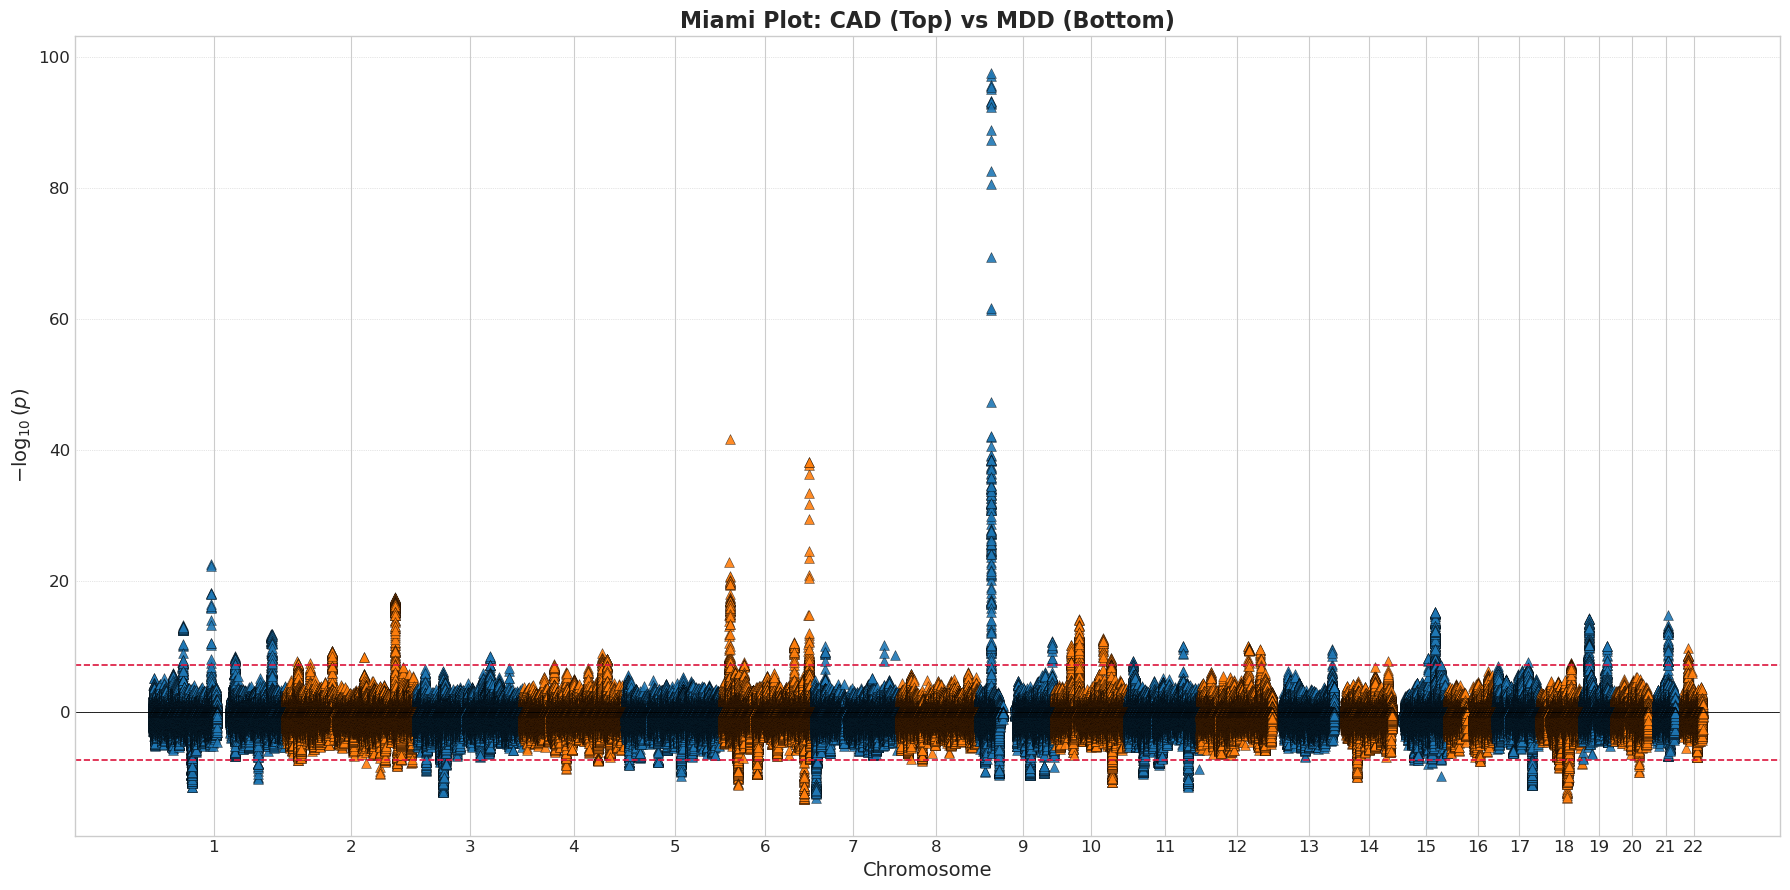

In [6]:
# import numpy as np
# import matplotlib.pyplot as plt

# # --- Prepare Data ---
# epsilon = 1e-300
# df1 = df1[df1['P'] > 0].copy()
# df2 = df2[df2['P'] > 0].copy()
# df1['P'] = df1['P'].clip(lower=epsilon)
# df2['P'] = df2['P'].clip(lower=epsilon)

# df1 = df1.dropna(subset=['CHR', 'BP', 'P'])
# df2 = df2.dropna(subset=['CHR', 'BP', 'P'])

# df1['CHR'] = df1['CHR'].astype(int)
# df2['CHR'] = df2['CHR'].astype(int)
# df1['BP'] = df1['BP'].astype(int)
# df2['BP'] = df2['BP'].astype(int)

# df1 = df1.sort_values(['CHR', 'BP'])
# df2 = df2.sort_values(['CHR', 'BP'])

# df1['minuslogp'] = -np.log10(df1['P'])
# df2['minuslogp'] = -np.log10(df2['P'])
# signif_threshold = -np.log10(5e-8)

# # --- Cumulative Position Setup ---
# all_chrs = sorted(set(df1['CHR'].unique()).union(set(df2['CHR'].unique())))
# chrom_offsets = {}
# offset = 0
# for chr_ in all_chrs:
#     max_bp = max(
#         df1[df1['CHR'] == chr_]['BP'].max() if chr_ in df1['CHR'].values else 0,
#         df2[df2['CHR'] == chr_]['BP'].max() if chr_ in df2['CHR'].values else 0
#     )
#     chrom_offsets[chr_] = offset
#     offset += max_bp + 1e6

# df1['cum_bp'] = df1.apply(lambda row: row['BP'] + chrom_offsets[row['CHR']], axis=1)
# df2['cum_bp'] = df2.apply(lambda row: row['BP'] + chrom_offsets[row['CHR']], axis=1)

# # --- Plot Styling ---
# plt.figure(figsize=(18, 9))
# plt.style.use('seaborn-whitegrid')

# # Define two contrasting vibrant colors
# colors = ['#1f77b4', '#ff7f0e']  # blue & orange

# # --- Plot CAD (Top) ---
# for i, chr_ in enumerate(all_chrs):
#     chr_df = df1[df1['CHR'] == chr_]
#     plt.scatter(
#         chr_df['cum_bp'], chr_df['minuslogp'],
#         color=colors[i % 2],
#         s=50,
#         alpha=0.9,
#         edgecolor='black',
#         linewidth=0.3,
#         marker='^'
#     )

# # --- Plot MDD (Bottom) ---
# for i, chr_ in enumerate(all_chrs):
#     chr_df = df2[df2['CHR'] == chr_]
#     plt.scatter(
#         chr_df['cum_bp'], -chr_df['minuslogp'],
#         color=colors[i % 2],
#         s=50,
#         alpha=0.9,
#         edgecolor='black',
#         linewidth=0.3,
#         marker='^'
#     )

# # --- Chromosome labels ---
# tick_positions = []
# tick_labels = []
# for chr_ in all_chrs:
#     pos = []
#     if chr_ in df1['CHR'].values:
#         pos += list(df1[df1['CHR'] == chr_]['cum_bp'])
#     if chr_ in df2['CHR'].values:
#         pos += list(df2[df2['CHR'] == chr_]['cum_bp'])
#     if pos:
#         tick_positions.append(np.median(pos))
#         tick_labels.append(str(chr_))

# # --- Significance lines ---
# plt.axhline(y=0, color='black', linewidth=0.6)
# plt.axhline(y=signif_threshold, color='crimson', linestyle='--', linewidth=1.2)
# plt.axhline(y=-signif_threshold, color='crimson', linestyle='--', linewidth=1.2)

# # --- Labels and Aesthetics ---
# plt.xticks(tick_positions, tick_labels, fontsize=12)
# plt.yticks(fontsize=12)
# plt.xlabel('Chromosome', fontsize=14)
# plt.ylabel(r'$-\log_{10}(p)$', fontsize=14)
# plt.title('Miami Plot: CAD (Top) vs MDD (Bottom)', fontsize=16, weight='bold')
# plt.grid(axis='y', linestyle=':', linewidth=0.5)

# plt.tight_layout()
# plt.savefig("Miami_plot_triangles_new.jpeg", dpi=300)
# plt.show()


/tmp/ipykernel_1257346/1594754517.py:43: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


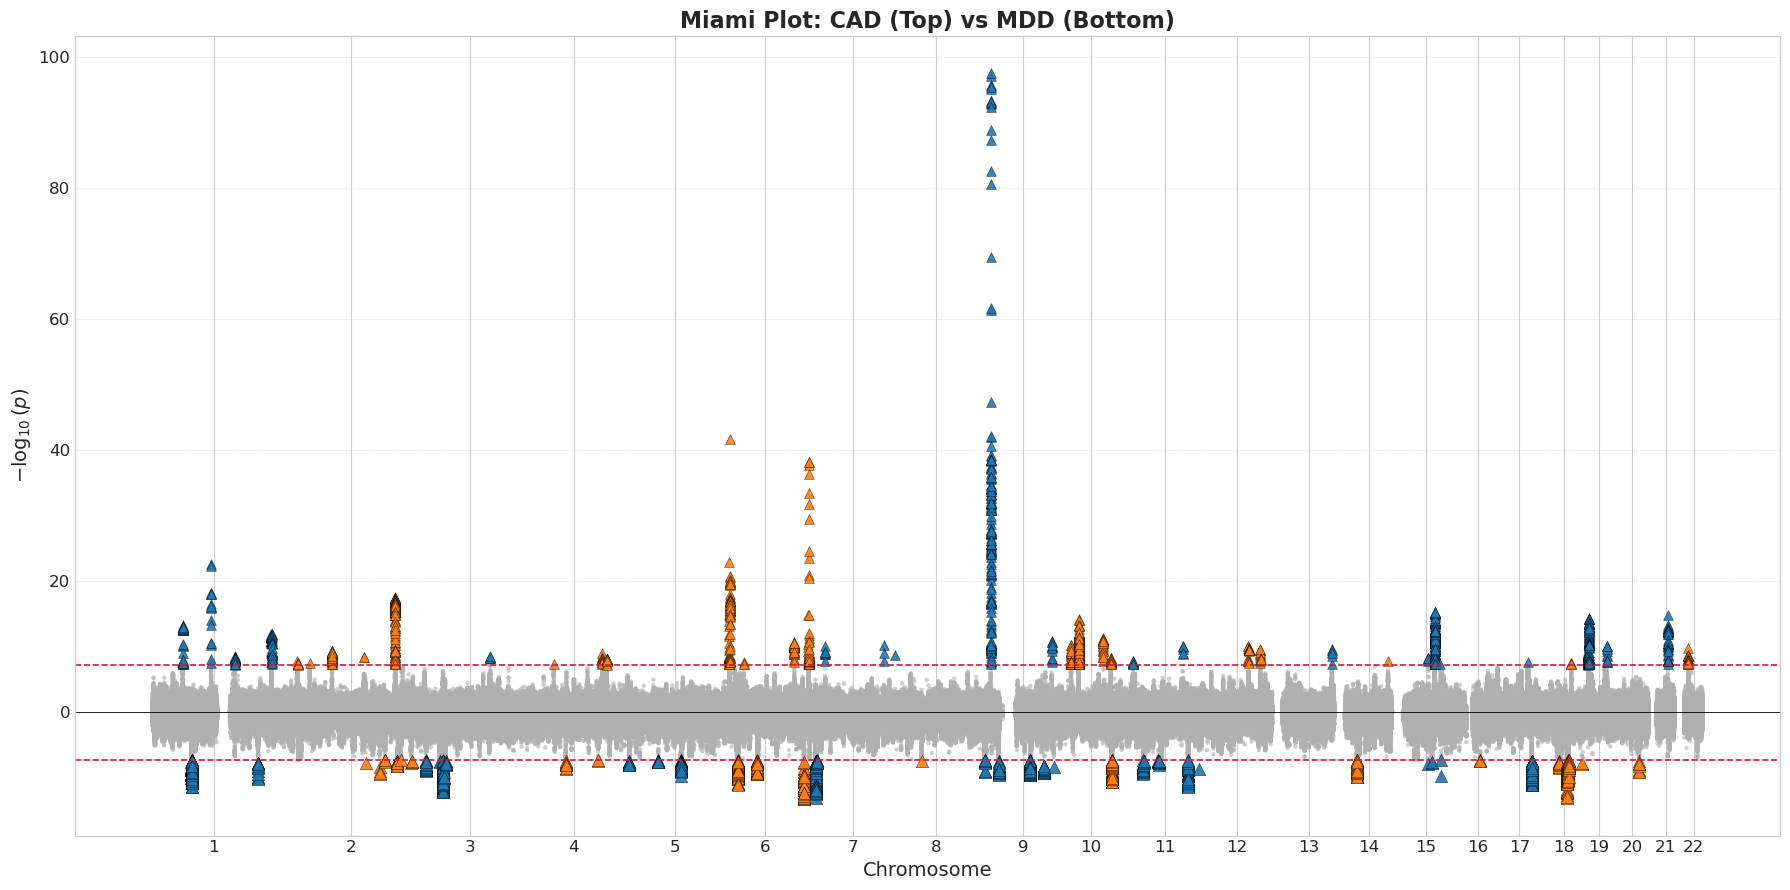

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# --- Prepare Data ---
epsilon = 1e-300
df1 = df1[df1['P'] > 0].copy()
df2 = df2[df2['P'] > 0].copy()
df1['P'] = df1['P'].clip(lower=epsilon)
df2['P'] = df2['P'].clip(lower=epsilon)

df1 = df1.dropna(subset=['CHR', 'BP', 'P'])
df2 = df2.dropna(subset=['CHR', 'BP', 'P'])

df1['CHR'] = df1['CHR'].astype(int)
df2['CHR'] = df2['CHR'].astype(int)
df1['BP'] = df1['BP'].astype(int)
df2['BP'] = df2['BP'].astype(int)

df1 = df1.sort_values(['CHR', 'BP'])
df2 = df2.sort_values(['CHR', 'BP'])

df1['minuslogp'] = -np.log10(df1['P'])
df2['minuslogp'] = -np.log10(df2['P'])
signif_threshold = -np.log10(5e-8)

# --- Cumulative Position Setup ---
all_chrs = sorted(set(df1['CHR'].unique()).union(set(df2['CHR'].unique())))
chrom_offsets = {}
offset = 0
for chr_ in all_chrs:
    max_bp = max(
        df1[df1['CHR'] == chr_]['BP'].max() if chr_ in df1['CHR'].values else 0,
        df2[df2['CHR'] == chr_]['BP'].max() if chr_ in df2['CHR'].values else 0
    )
    chrom_offsets[chr_] = offset
    offset += max_bp + 1e6

df1['cum_bp'] = df1.apply(lambda row: row['BP'] + chrom_offsets[row['CHR']], axis=1)
df2['cum_bp'] = df2.apply(lambda row: row['BP'] + chrom_offsets[row['CHR']], axis=1)

# --- Plot Styling ---
plt.figure(figsize=(18, 9))
plt.style.use('seaborn-whitegrid')

# Define two contrasting vibrant colors
colors = ['#1f77b4', '#ff7f0e']  # blue & orange
grey = '#B0B0B0'  # grey for non-significant

# --- Plot CAD (Top) ---
for i, chr_ in enumerate(all_chrs):
    chr_df = df1[df1['CHR'] == chr_]
    sig = chr_df['minuslogp'] >= signif_threshold

    # Non-significant: grey dots
    plt.scatter(
        chr_df.loc[~sig, 'cum_bp'], chr_df.loc[~sig, 'minuslogp'],
        color=grey, s=10, alpha=0.6, edgecolor='none', marker='o'
    )
    # Significant: vibrant triangles
    plt.scatter(
        chr_df.loc[sig, 'cum_bp'], chr_df.loc[sig, 'minuslogp'],
        color=colors[i % 2], s=50, alpha=0.9, edgecolor='black', linewidth=0.3, marker='^'
    )

# --- Plot MDD (Bottom) ---
for i, chr_ in enumerate(all_chrs):
    chr_df = df2[df2['CHR'] == chr_]
    sig = chr_df['minuslogp'] >= signif_threshold

    # Non-significant: grey dots
    plt.scatter(
        chr_df.loc[~sig, 'cum_bp'], -chr_df.loc[~sig, 'minuslogp'],
        color=grey, s=10, alpha=0.6, edgecolor='none', marker='o'
    )
    # Significant: vibrant triangles
    plt.scatter(
        chr_df.loc[sig, 'cum_bp'], -chr_df.loc[sig, 'minuslogp'],
        color=colors[i % 2], s=80, alpha=0.9, edgecolor='black', linewidth=0.3, marker='^'
    )

# --- Chromosome labels ---
tick_positions = []
tick_labels = []
for chr_ in all_chrs:
    pos = []
    if chr_ in df1['CHR'].values:
        pos += list(df1[df1['CHR'] == chr_]['cum_bp'])
    if chr_ in df2['CHR'].values:
        pos += list(df2[df2['CHR'] == chr_]['cum_bp'])
    if pos:
        tick_positions.append(np.median(pos))
        tick_labels.append(str(chr_))

# --- Significance lines ---
plt.axhline(y=0, color='black', linewidth=0.6)
plt.axhline(y=signif_threshold, color='crimson', linestyle='--', linewidth=1.2)
plt.axhline(y=-signif_threshold, color='crimson', linestyle='--', linewidth=1.2)

# --- Labels and Aesthetics ---
plt.xticks(tick_positions, tick_labels, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Chromosome', fontsize=14)
plt.ylabel(r'$-\log_{10}(p)$', fontsize=14)
plt.title('Miami Plot: CAD (Top) vs MDD (Bottom)', fontsize=16, weight='bold')
plt.grid(axis='y', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.savefig("Miami_plot_triangles_grey_dots.jpeg", dpi=300)
plt.show()

In [9]:
# Count significant SNPs in df1 (CAD)
n_sig_df1 = (df1['minuslogp'] >= signif_threshold).sum()
print(f"Number of significant SNPs in CAD: {n_sig_df1}")

# Count significant SNPs in df2 (MDD)
n_sig_df2 = (df2['minuslogp'] >= signif_threshold).sum()
print(f"Number of significant SNPs in MDD: {n_sig_df2}")

Number of significant SNPs in CAD: 2213
Number of significant SNPs in MDD: 3189


## 3. Volcano Plots for CAD & MDD

In [35]:
df1 = pd.read_csv("../1_CAD/CAD_clean.csv")
df2 = pd.read_csv("../2_MDD/MDD_clean.csv")

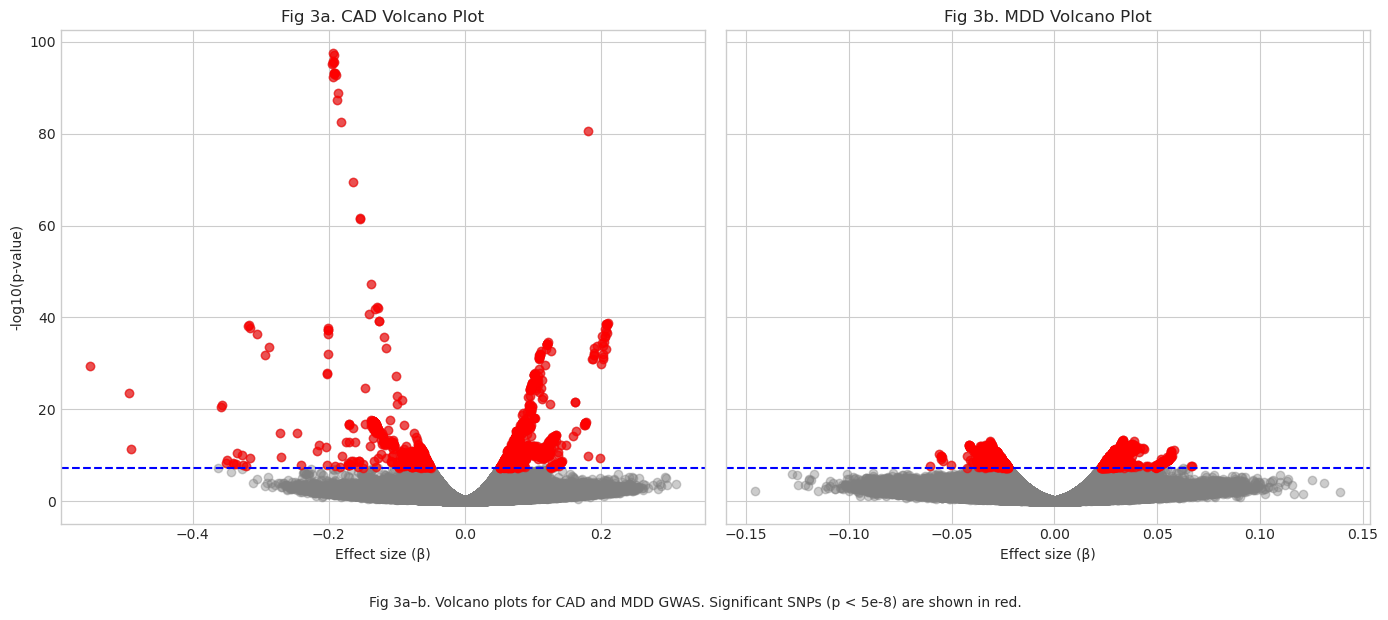

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# ---- CAD Volcano Plot Data ----
df1['-LOG10(P)'] = -np.log10(df1['P'])
sig_cad = df1['P'] < 5e-8

# ---- MDD Volcano Plot Data ----
df2['-LOG10(P)'] = -np.log10(df2['P'])
sig_mdd = df2['P'] < 5e-8

# ---- Create Side-by-Side Plots ----
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# --- Plot 1: CAD Volcano ---
axes[0].scatter(df1['BETA'], df1['-LOG10(P)'], c='grey', alpha=0.4)
axes[0].scatter(df1.loc[sig_cad, 'BETA'], df1.loc[sig_cad, '-LOG10(P)'], c='red', alpha=0.6)
axes[0].axhline(-np.log10(5e-8), color='blue', linestyle='--')
axes[0].set_xlabel('Effect size (β)')
axes[0].set_ylabel('-log10(p-value)')
axes[0].set_title('Fig 3a. CAD Volcano Plot')
axes[0].grid(True)

# --- Plot 2: MDD Volcano ---
axes[1].scatter(df2['BETA'], df2['-LOG10(P)'], c='grey', alpha=0.4)
axes[1].scatter(df2.loc[sig_mdd, 'BETA'], df2.loc[sig_mdd, '-LOG10(P)'], c='red', alpha=0.6)
axes[1].axhline(-np.log10(5e-8), color='blue', linestyle='--')
axes[1].set_xlabel('Effect size (β)')
axes[1].set_title('Fig 3b. MDD Volcano Plot')
axes[1].grid(True)

# --- Caption below both plots ---
fig.text(0.5, -0.02,
         'Fig 3a–b. Volcano plots for CAD and MDD GWAS. Significant SNPs (p < 5e-8) are shown in red.',
         ha='center', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 1])  # leave space for caption
# plt.savefig("CAD_MDD_volcano_side_by_side.jpg", dpi=300, bbox_inches='tight')
plt.show()


## 4. Barplot for significant SNPs per chromosome

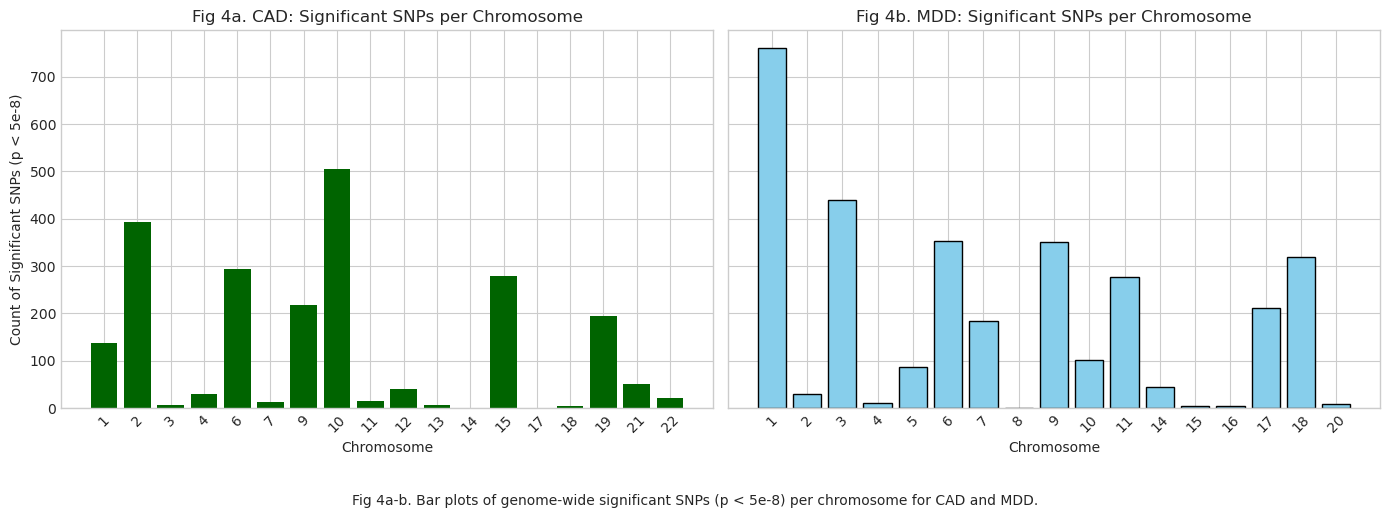

In [40]:
import matplotlib.pyplot as plt

# --- CAD Barplot Data ---
sig_counts_cad = df1[df1['P'] < 5e-8].groupby('CHR').size().sort_index()

# --- MDD Barplot Data ---
sig_threshold = 5e-8
gw_sig = df2[df2['P'] < sig_threshold].copy()

# Ensure CHR is clean and integer
gw_sig['CHR'] = gw_sig['CHR'].astype(str).str.replace('CHR', '', case=False)
gw_sig['CHR'] = gw_sig['CHR'].astype(float).astype(int)
sig_counts_mdd = gw_sig['CHR'].value_counts().sort_index()

# --- Plot side-by-side ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot 1: CAD
axes[0].bar(sig_counts_cad.index.astype(str), sig_counts_cad.values, color='darkgreen')
axes[0].set_xlabel('Chromosome')
axes[0].set_ylabel('Count of Significant SNPs (p < 5e-8)')
axes[0].set_title('Fig 4a. CAD: Significant SNPs per Chromosome')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: MDD
axes[1].bar(sig_counts_mdd.index.astype(str), sig_counts_mdd.values, color='skyblue', edgecolor='black')
axes[1].set_xlabel('Chromosome')
axes[1].set_title('Fig 4b. MDD: Significant SNPs per Chromosome')
axes[1].tick_params(axis='x', rotation=45)

# --- Optional shared caption ---
fig.text(0.5, -0.02,
         'Fig 4a-b. Bar plots of genome-wide significant SNPs (p < 5e-8) per chromosome for CAD and MDD.',
         ha='center', fontsize=10)

plt.tight_layout(rect=[0, 0.05, 1, 1])
# plt.savefig("CAD_MDD_sig_SNPs_per_chr.jpeg", dpi=300)
plt.show()
